# The role of Community Transmission in the increase of Covid-19 cases





In [360]:
import pandas as pd
from pandas import read_excel
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model      import LogisticRegression
from sklearn.metrics           import confusion_matrix, accuracy_score
from sklearn                   import linear_model, ensemble, preprocessing
from sklearn.model_selection   import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics           import r2_score, mean_squared_error, accuracy_score
from sklearn                   import tree
from sklearn.tree              import DecisionTreeClassifier
from sklearn.tree              import DecisionTreeRegressor

## Data Cleaning


In [361]:
#Read the datasets
df1=pd.read_csv("data/public-gathering-rules-covid.csv")
df2 = pd.read_excel(open('data/acaps_covid19_government_measures_dataset_0.xlsx', 'rb'), sheet_name= 'Dataset')
df3 = pd.read_csv("files/owid-covid-data.csv")

In [362]:
df1.head()

,Entity,Code,Day,restriction_gatherings
0,Afghanistan,AFG,2020-01-01,0
1,Afghanistan,AFG,2020-01-02,0
2,Afghanistan,AFG,2020-01-03,0
3,Afghanistan,AFG,2020-01-04,0
4,Afghanistan,AFG,2020-01-05,0


In [363]:
df2.head()

,ID,ISO,COUNTRY,REGION,ADMIN_LEVEL_NAME,PCODE,LOG_TYPE,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
0,4245,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Awareness campaigns,NaN,MoPH begins announcements on their facebook to...,NaN,2020-01-24,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1005130...,2020-04-07,NaN
1,4246,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,checked,Health teams at airports will check passengers...,NaN,2020-01-26,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1006458...,2020-04-07,NaN
2,4247,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Movement restrictions,International flights suspension,checked,Flights to China are suspended.,NaN,2020-01-27,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/photos/a.4625...,2020-04-07,NaN
3,4248,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,NaN,Health screenings of all passengers at airports.,NaN,2020-01-27,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/photos/a.4625...,2020-04-07,NaN
4,23,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Movement restrictions,Border checks,checked,All China and Iran nationals,NaN,2020-02-01,US Embassy,Government,https://af.usembassy.gov/covid-19-information/,2020-03-14,NaN


In [364]:
df3.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [365]:
#Change the datatype of 'DATE_IMPLEMENTED' and 'Day' to datetime
df1['Day'] = pd.to_datetime(df1['Day'])
df2['DATE_IMPLEMENTED'] = pd.to_datetime(df2['DATE_IMPLEMENTED'])


In [366]:
df3['date'] = pd.to_datetime(df3['date'])

In [367]:
#Rename columns in df1
df1.rename(columns ={
    'Entity' : 'COUNTRY',
    'Day' : 'DATE_IMPLEMENTED'
}, inplace=True)

df1

,COUNTRY,Code,DATE_IMPLEMENTED,restriction_gatherings
0,Afghanistan,AFG,2020-01-01,0
1,Afghanistan,AFG,2020-01-02,0
2,Afghanistan,AFG,2020-01-03,0
3,Afghanistan,AFG,2020-01-04,0
4,Afghanistan,AFG,2020-01-05,0
...,...,...,...,...
120907,Zimbabwe,ZWE,2021-10-07,2
120908,Zimbabwe,ZWE,2021-10-08,2
120909,Zimbabwe,ZWE,2021-10-09,2
120910,Zimbabwe,ZWE,2021-10-10,2


In [368]:
#Rename columns in df3
df3.rename(columns ={
    'location' : 'COUNTRY',
    'date' : 'DATE_IMPLEMENTED'
}, inplace=True)
df3

,iso_code,continent,COUNTRY,DATE_IMPLEMENTED,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125960,ZWE,Africa,Zimbabwe,2021-10-20,132437.0,32.0,47.000,4659.0,0.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
125961,ZWE,Africa,Zimbabwe,2021-10-21,132540.0,103.0,41.286,4662.0,3.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
125962,ZWE,Africa,Zimbabwe,2021-10-22,132588.0,48.0,43.286,4663.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
125963,ZWE,Africa,Zimbabwe,2021-10-23,132588.0,0.0,36.429,4663.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [369]:
#Drop the redundant collums 
df2=df2.drop(columns = ['ADMIN_LEVEL_NAME', 'TARGETED_POP_GROUP', 'NON_COMPLIANCE', 'PCODE', 'Alternative source', 'LINK', 'SOURCE_TYPE', 'ENTRY_DATE', 'ISO', 'REGION', 'LOG_TYPE', 'SOURCE'], axis = 1)
df2.head()

,ID,COUNTRY,CATEGORY,MEASURE,COMMENTS,DATE_IMPLEMENTED
0,4245,Afghanistan,Public health measures,Awareness campaigns,MoPH begins announcements on their facebook to...,2020-01-24
1,4246,Afghanistan,Public health measures,Health screenings in airports and border cross...,Health teams at airports will check passengers...,2020-01-26
2,4247,Afghanistan,Movement restrictions,International flights suspension,Flights to China are suspended.,2020-01-27
3,4248,Afghanistan,Public health measures,Health screenings in airports and border cross...,Health screenings of all passengers at airports.,2020-01-27
4,23,Afghanistan,Movement restrictions,Border checks,All China and Iran nationals,2020-02-01


NameError: name 'cmeasure' is not defined

In [371]:
df3.drop(df3.columns.difference(['COUNTRY','DATE_IMPLEMENTED', 'total_cases', 'new_cases']), 1, inplace=True)
df3

,COUNTRY,DATE_IMPLEMENTED,total_cases,new_cases
0,Afghanistan,2020-02-24,5.0,5.0
1,Afghanistan,2020-02-25,5.0,0.0
2,Afghanistan,2020-02-26,5.0,0.0
3,Afghanistan,2020-02-27,5.0,0.0
4,Afghanistan,2020-02-28,5.0,0.0
...,...,...,...,...
125960,Zimbabwe,2021-10-20,132437.0,32.0
125961,Zimbabwe,2021-10-21,132540.0,103.0
125962,Zimbabwe,2021-10-22,132588.0,48.0
125963,Zimbabwe,2021-10-23,132588.0,0.0


### There are 10 countries are chosen for the analysis

<ol>
<li>United States</li>
<li>India</li>
<li>Brazil</li>
<li>Russia </li>
<li>Turkey </li>
<li>France </li>
<li>Iran </li>
<li>Argentina </li>
<li>Spain </li>
<li>Germany </li>
</ol>

In [372]:
#Sorting out 10 countries and measure that affect community transmission
countries =cl["COUNTRY"].isin(["Argentina", "Germany", "France","India", "Iran", "Spain", "United States","Turkey","Brazil","Russia" ])
measure = cl["MEASURE"].isin(["Awareness campaigns"])
ms = cl[countries & measure]
ms

,ID,COUNTRY,CATEGORY,MEASURE,COMMENTS,DATE_IMPLEMENTED
660,879,Argentina,Public health measures,Awareness campaigns,Campaign for argentinians abroad,2020-02-17
3331,1124,Brazil,Public health measures,Awareness campaigns,Ministry of Health holds regular press confere...,2020-03-18
3337,2220,Brazil,Public health measures,Awareness campaigns,Influenza vaccination campaign. The influenza ...,2020-03-23
7976,6030,France,Public health measures,Awareness campaigns,Government is publishing a list of companies t...,2020-04-17
7985,8443,France,Public health measures,Awareness campaigns,On how to live a healthy lifestyle during the ...,2020-04-28
...,...,...,...,...,...,...
23324,141398,United States,Public health measures,Awareness campaigns,Social Media Toolkit: Holidays,2020-11-19
23329,141399,United States,Public health measures,Awareness campaigns,ACIP will issue recommendations to CDC on a et...,2020-11-20
23332,141402,United States,Public health measures,Awareness campaigns,8 Things to Know about Vaccine Planning,2020-11-20
23333,141406,United States,Public health measures,Awareness campaigns,Emergency Use Authorization for Vaccines Expla...,2020-11-20


In [416]:
#Set index by column'DATE_IMPLEMENTED'
def reset_idx(df, col):
    df.set_index(col, inplace=True) #reset index
    return df
#Create a list containing daily data
df_list=[]
for i in ms['COUNTRY'].unique():
    df=ms[ms['COUNTRY']==i]
    reset_idx(df, 'DATE_IMPLEMENTED') 
    idx = pd.date_range(start=df.index.min(), end=df.index.max()) #create daily range 
    df.index = pd.DatetimeIndex(df.index)
    idx_non_dup = np.unique( df.index.values, return_index = True )[1]
    df = df.iloc[idx_non_dup]
    df = df.reindex(idx) #change index to daily data
    df.ffill(inplace=True) #Fill missing value by previous row values
    df['DATE_IMPLEMENTED']=pd.DatetimeIndex(df.index)
    df_list.append(df)
df_list
#Add all country dataframe together
d_case=df_list[0].append(df_list[1:])
d_case

,ID,COUNTRY,CATEGORY,MEASURE,COMMENTS,DATE_IMPLEMENTED
2020-02-17,879.0,Argentina,Public health measures,Awareness campaigns,Campaign for argentinians abroad,2020-02-17
2020-03-18,1124.0,Brazil,Public health measures,Awareness campaigns,Ministry of Health holds regular press confere...,2020-03-18
2020-03-19,1124.0,Brazil,Public health measures,Awareness campaigns,Ministry of Health holds regular press confere...,2020-03-19
2020-03-20,1124.0,Brazil,Public health measures,Awareness campaigns,Ministry of Health holds regular press confere...,2020-03-20
2020-03-21,1124.0,Brazil,Public health measures,Awareness campaigns,Ministry of Health holds regular press confere...,2020-03-21
...,...,...,...,...,...,...
2020-11-23,141399.0,United States,Public health measures,Awareness campaigns,ACIP will issue recommendations to CDC on a et...,2020-11-23
2020-11-24,141399.0,United States,Public health measures,Awareness campaigns,ACIP will issue recommendations to CDC on a et...,2020-11-24
2020-11-25,141399.0,United States,Public health measures,Awareness campaigns,ACIP will issue recommendations to CDC on a et...,2020-11-25
2020-11-26,141399.0,United States,Public health measures,Awareness campaigns,ACIP will issue recommendations to CDC on a et...,2020-11-26


In [417]:
#Merge two tables of new cases and the level of restriction 
cases = pd.merge(df1, df3, on=['COUNTRY', 'DATE_IMPLEMENTED'], how = 'left')
cases

,COUNTRY,Code,DATE_IMPLEMENTED,restriction_gatherings,total_cases,new_cases
0,Afghanistan,AFG,2020-01-01,0,NaN,NaN
1,Afghanistan,AFG,2020-01-02,0,NaN,NaN
2,Afghanistan,AFG,2020-01-03,0,NaN,NaN
3,Afghanistan,AFG,2020-01-04,0,NaN,NaN
4,Afghanistan,AFG,2020-01-05,0,NaN,NaN
...,...,...,...,...,...,...
120907,Zimbabwe,ZWE,2021-10-07,2,131523.0,89.0
120908,Zimbabwe,ZWE,2021-10-08,2,131705.0,182.0
120909,Zimbabwe,ZWE,2021-10-09,2,131762.0,57.0
120910,Zimbabwe,ZWE,2021-10-10,2,131796.0,34.0


In [418]:
#merge ct_cases with the ms
ct_cases = pd.merge(d_case, cases, on=['COUNTRY', 'DATE_IMPLEMENTED'], how = 'left')
ct_cases

,ID,COUNTRY,CATEGORY,MEASURE,COMMENTS,DATE_IMPLEMENTED,Code,restriction_gatherings,total_cases,new_cases
0,879.0,Argentina,Public health measures,Awareness campaigns,Campaign for argentinians abroad,2020-02-17,ARG,0,NaN,NaN
1,1124.0,Brazil,Public health measures,Awareness campaigns,Ministry of Health holds regular press confere...,2020-03-18,BRA,3,372.0,51.0
2,1124.0,Brazil,Public health measures,Awareness campaigns,Ministry of Health holds regular press confere...,2020-03-19,BRA,3,621.0,249.0
3,1124.0,Brazil,Public health measures,Awareness campaigns,Ministry of Health holds regular press confere...,2020-03-20,BRA,3,793.0,172.0
4,1124.0,Brazil,Public health measures,Awareness campaigns,Ministry of Health holds regular press confere...,2020-03-21,BRA,3,1021.0,228.0
...,...,...,...,...,...,...,...,...,...,...
729,141399.0,United States,Public health measures,Awareness campaigns,ACIP will issue recommendations to CDC on a et...,2020-11-23,USA,4,12543324.0,173177.0
730,141399.0,United States,Public health measures,Awareness campaigns,ACIP will issue recommendations to CDC on a et...,2020-11-24,USA,4,12720653.0,177329.0
731,141399.0,United States,Public health measures,Awareness campaigns,ACIP will issue recommendations to CDC on a et...,2020-11-25,USA,4,12905298.0,184645.0
732,141399.0,United States,Public health measures,Awareness campaigns,ACIP will issue recommendations to CDC on a et...,2020-11-26,USA,4,13021515.0,116217.0


## Analysis for the rising of new cases caused by community transmission


<AxesSubplot:xlabel='restriction_gatherings', ylabel='count'>

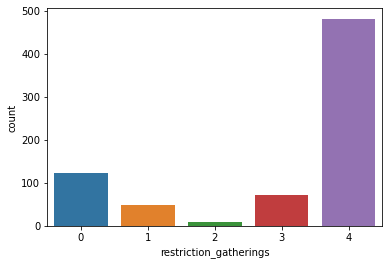

In [419]:
sns.countplot(x= 'restriction_gatherings', data = ct_cases)

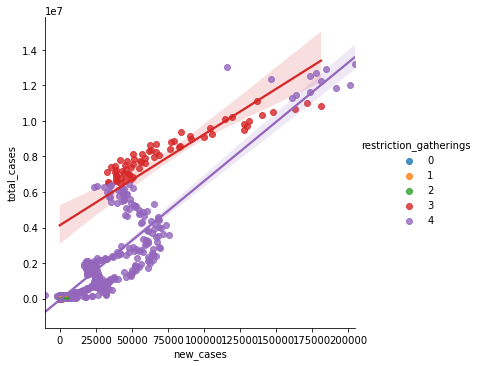

In [420]:
sns.lmplot(x = 'new_cases', y = 'total_cases',hue = 'restriction_gatherings', data = ct_cases)

## Logistic Regression and RFE


In [421]:
ct_cases.dtypes

ID                               float64
COUNTRY                           object
CATEGORY                          object
MEASURE                           object
COMMENTS                          object
DATE_IMPLEMENTED          datetime64[ns]
Code                              object
restriction_gatherings             int64
total_cases                      float64
new_cases                        float64
dtype: object

In [422]:
ct_cases.describe()

,ID,restriction_gatherings,total_cases,new_cases
count,734.000000,734.000000,7.330000e+02,733.000000
mean,28304.491826,3.002725,1.751727e+06,22633.286494
std,45350.141004,1.567923,2.904920e+06,33692.638226
min,376.000000,0.000000,6.000000e+00,-10034.000000
25%,3149.000000,3.000000,6.258900e+04,1030.000000
50%,9276.000000,4.000000,1.829220e+05,4885.000000
75%,14892.000000,4.000000,2.027074e+06,34975.000000
max,142561.000000,4.000000,1.322645e+07,204936.000000


In [423]:
ct_cases.shape

(734, 10)

In [424]:
ct_cases1 = ct_cases.replace({0.0: 1, 2.0: 1, 3.0:2, 4.0: 2})
ct_cases1 = ct_cases1[ct_cases1.restriction_gatherings != 0]
ct_cases1

,ID,COUNTRY,CATEGORY,MEASURE,COMMENTS,DATE_IMPLEMENTED,Code,restriction_gatherings,total_cases,new_cases
0,879.0,Argentina,Public health measures,Awareness campaigns,Campaign for argentinians abroad,2020-02-17,ARG,1,NaN,NaN
1,1124.0,Brazil,Public health measures,Awareness campaigns,Ministry of Health holds regular press confere...,2020-03-18,BRA,2,372.0,51.0
2,1124.0,Brazil,Public health measures,Awareness campaigns,Ministry of Health holds regular press confere...,2020-03-19,BRA,2,621.0,249.0
3,1124.0,Brazil,Public health measures,Awareness campaigns,Ministry of Health holds regular press confere...,2020-03-20,BRA,2,793.0,172.0
4,1124.0,Brazil,Public health measures,Awareness campaigns,Ministry of Health holds regular press confere...,2020-03-21,BRA,2,1021.0,228.0
...,...,...,...,...,...,...,...,...,...,...
729,141399.0,United States,Public health measures,Awareness campaigns,ACIP will issue recommendations to CDC on a et...,2020-11-23,USA,2,12543324.0,173177.0
730,141399.0,United States,Public health measures,Awareness campaigns,ACIP will issue recommendations to CDC on a et...,2020-11-24,USA,2,12720653.0,177329.0
731,141399.0,United States,Public health measures,Awareness campaigns,ACIP will issue recommendations to CDC on a et...,2020-11-25,USA,2,12905298.0,184645.0
732,141399.0,United States,Public health measures,Awareness campaigns,ACIP will issue recommendations to CDC on a et...,2020-11-26,USA,2,13021515.0,116217.0


In [425]:
ct_cases1 = ct_cases1.drop(columns = ['CATEGORY', 'COMMENTS', 'Code', ], axis = 1)
ct_cases1

,ID,COUNTRY,MEASURE,DATE_IMPLEMENTED,restriction_gatherings,total_cases,new_cases
0,879.0,Argentina,Awareness campaigns,2020-02-17,1,NaN,NaN
1,1124.0,Brazil,Awareness campaigns,2020-03-18,2,372.0,51.0
2,1124.0,Brazil,Awareness campaigns,2020-03-19,2,621.0,249.0
3,1124.0,Brazil,Awareness campaigns,2020-03-20,2,793.0,172.0
4,1124.0,Brazil,Awareness campaigns,2020-03-21,2,1021.0,228.0
...,...,...,...,...,...,...,...
729,141399.0,United States,Awareness campaigns,2020-11-23,2,12543324.0,173177.0
730,141399.0,United States,Awareness campaigns,2020-11-24,2,12720653.0,177329.0
731,141399.0,United States,Awareness campaigns,2020-11-25,2,12905298.0,184645.0
732,141399.0,United States,Awareness campaigns,2020-11-26,2,13021515.0,116217.0


In [426]:
ct_cases1['restriction_gatherings'].unique()

array([1, 2], dtype=int64)

In [427]:
ct_cases1['restriction_gatherings'].value_counts()

2    552
1    182
Name: restriction_gatherings, dtype: int64

In [428]:
ct_cases1.isna().sum()

ID                        0
COUNTRY                   0
MEASURE                   0
DATE_IMPLEMENTED          0
restriction_gatherings    0
total_cases               1
new_cases                 1
dtype: int64

In [429]:
ct_cases1 = ct_cases1.dropna()

In [430]:
ct_cases1.shape

(733, 7)

In [431]:
ct_cases1['restriction_gatherings'].unique()

array([2, 1], dtype=int64)

In [432]:
train, test = train_test_split(ct_cases1, test_size = 0.2, random_state =142)
print(train.shape)
print(test.shape)

(586, 7)
(147, 7)


In [433]:
x_train = train.drop([ 'restriction_gatherings', 'COUNTRY', 'DATE_IMPLEMENTED', 'MEASURE'], axis =1)
y_train = train['restriction_gatherings']
x_test = test.drop([ 'restriction_gatherings', 'COUNTRY', 'DATE_IMPLEMENTED', 'MEASURE' ], axis =1)
y_test = test['restriction_gatherings']

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(586, 3) (586,) (147, 3) (147,)


In [434]:
ct_cases1.dtypes

ID                               float64
COUNTRY                           object
MEASURE                           object
DATE_IMPLEMENTED          datetime64[ns]
restriction_gatherings             int64
total_cases                      float64
new_cases                        float64
dtype: object

In [435]:
# Build your Logistic Regression model
model = LogisticRegression() 
model.fit(x_train, y_train) 


LogisticRegression()

In [436]:
y_hat_train = model.predict(x_train)
y_hat_test = model.predict(x_test)

In [437]:
print("Accuracy score on training set:", accuracy_score(y_train, y_hat_train))
print("Accuracy score on testing set: ", accuracy_score(y_test, y_hat_test))

Accuracy score on training set: 0.7474402730375427
Accuracy score on testing set:  0.7755102040816326


In [438]:
print(confusion_matrix(y_test, y_hat_test))

[[  0  33]
 [  0 114]]


### RFE

In [439]:
lr_model = LogisticRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=5, step=1)
rfe.fit(x_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [440]:
y_test_hat = rfe.predict(x_test)
print("accuracy score on test set: ", accuracy_score(y_test, y_test_hat))

accuracy score on test set:  0.7755102040816326


In [441]:
for i in range(x_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000


In [442]:
#to increment number of features, one at each time
acc_scores = []
for i in range(1,10):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # training model
    rfe.fit(x_train, y_train)
    # predicting on test set
    y_pred = rfe.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred)
    # print this
    print("Acc on test set using", i, "features: ", acc_score)
    # append to the list
    acc_scores.append(acc_score)

Acc on test set using 1 features:  0.7006802721088435
Acc on test set using 2 features:  0.7755102040816326
Acc on test set using 3 features:  0.7755102040816326
Acc on test set using 4 features:  0.7755102040816326
Acc on test set using 5 features:  0.7755102040816326
Acc on test set using 6 features:  0.7755102040816326
Acc on test set using 7 features:  0.7755102040816326
Acc on test set using 8 features:  0.7755102040816326
Acc on test set using 9 features:  0.7755102040816326


C:\Users\nguye\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\nguye\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\nguye\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\nguye\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_featur

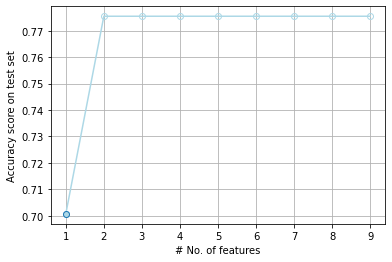

In [443]:
# estimating accuracy score on test set using RFE by using different number of features
estimator = LogisticRegression()
acc_scores = []
for i in range(1, 10):
    selector = RFE(estimator, i)
    selector = selector.fit(x_train, y_train)
    supp = selector.get_support()

    predicted = selector.predict(x_test)
    acc_score = accuracy_score(y_test, predicted)
    acc_scores.append(acc_score)
  
best = 1
for item in acc_scores:
    if item < acc_scores[best - 1]:
        best = acc_scores.index(item) + 1

plt.grid()   
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.plot(range(1, 10), acc_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'lightblue', markerfacecolor = 'None')
plt.plot(best, acc_scores[best-1], marker = 'o', markerfacecolor = 'lightblue')

### Decision tree

In [444]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
ct_cases_dt = imputer.fit_transform(ct_cases)

pd.DataFrame(data=ct_cases, columns=ct_cases.columns).head()

,ID,COUNTRY,CATEGORY,MEASURE,COMMENTS,DATE_IMPLEMENTED,Code,restriction_gatherings,total_cases,new_cases
0,879.0,Argentina,Public health measures,Awareness campaigns,Campaign for argentinians abroad,2020-02-17,ARG,0,NaN,NaN
1,1124.0,Brazil,Public health measures,Awareness campaigns,Ministry of Health holds regular press confere...,2020-03-18,BRA,3,372.0,51.0
2,1124.0,Brazil,Public health measures,Awareness campaigns,Ministry of Health holds regular press confere...,2020-03-19,BRA,3,621.0,249.0
3,1124.0,Brazil,Public health measures,Awareness campaigns,Ministry of Health holds regular press confere...,2020-03-20,BRA,3,793.0,172.0
4,1124.0,Brazil,Public health measures,Awareness campaigns,Ministry of Health holds regular press confere...,2020-03-21,BRA,3,1021.0,228.0


In [445]:
# Data pre-processing and preparation
# Firstly, we need to convert the date from being categorical to being numerical
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
enc_X = OrdinalEncoder()
enc_y = LabelEncoder()

# The first attribute is the target, while the rest attributes are the features
target_index=0
X = enc_X.fit_transform(ct_cases_dt[:, 1:])
y = enc_y.fit_transform(ct_cases_dt[:, target_index])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [446]:
# Train a decision tree model for classification
clf_default = DecisionTreeClassifier(random_state=42)
clf_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Visualize the tree structure.
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf_default, max_depth=4, filled=True, fontsize=10, 
               feature_names=ct_cases.columns[1:], class_names=enc_y.classes_)
plt.show()